# The Sparks Foundation

## Name: Yash K Jain


## Task 2: Prediction using Unsupervised ML

### >_From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually._

#### Importing Libraries and Dataset

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv("iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [33]:
# remove column 'Id'
df.drop(labels='Id',axis=1,inplace=True)

In [34]:
X=df.drop(['Species'], axis=1).values
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

#### Data Visualization

In [35]:
import seaborn as sns

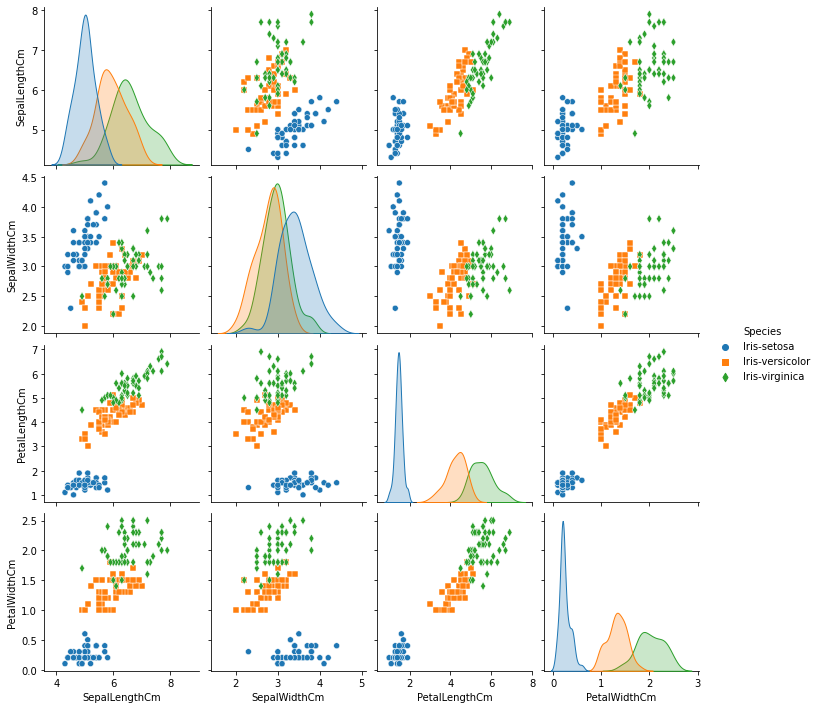

In [36]:
sns.pairplot(df,hue='Species',markers=["o", "s", "d"])

#### Correlation between different variabes in datsets

In [37]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


#### Visualization of correlation using Heatmap

<AxesSubplot:>

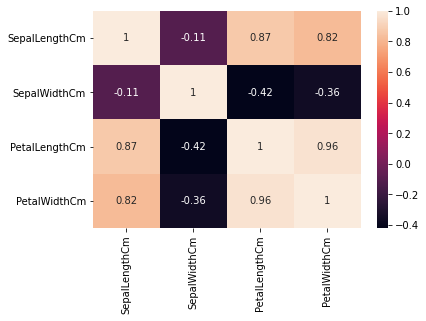

In [38]:
sns.heatmap(df.corr(),annot=True)

* Petal width and petal length are higly correlated

#### K-Means Clustering

In [39]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,random_state=0)
kmeans = kmeans.fit(X)
kmeans.inertia_

78.94084142614601

In [40]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
wcss

[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.317873214285726,
 46.56163015873017,
 38.930963049671746,
 34.190687924796634,
 30.063874432733137,
 27.84235606060608,
 26.04820224804435]

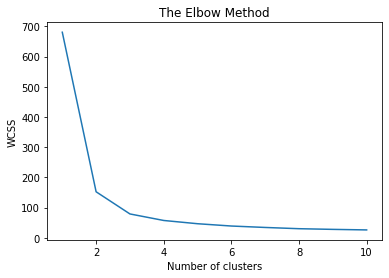

In [41]:
plt.plot(range(1,11),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method')
plt.show()

The optimum number of clusters is where the elbow occurs. From the graph we can see that the elbow occurs at n=2 and n=3. From n=3, the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration. Therefore, we will take optimum number of clusters=3

#### Implementing the Kmeans to dataset and creating the Kmeans classifier

In [42]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 10)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

#### Visualizing the clusters

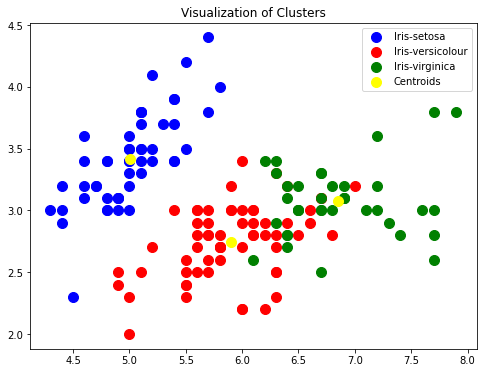

In [44]:
plt.figure(figsize=(8,6))

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.title('Visualization of Clusters')
plt.legend()
plt.show()